# Import required libraries

In [1]:
### Pandas and numpy
import pandas as pd
import numpy as np

### visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## to ignore warnings
import warnings
warnings.filterwarnings('ignore')

###machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report ,r2_score

### To be able to see maximum columns on screen 
pd.set_option('display.max_columns',500)

### To save the model
import pickle



importing wine dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

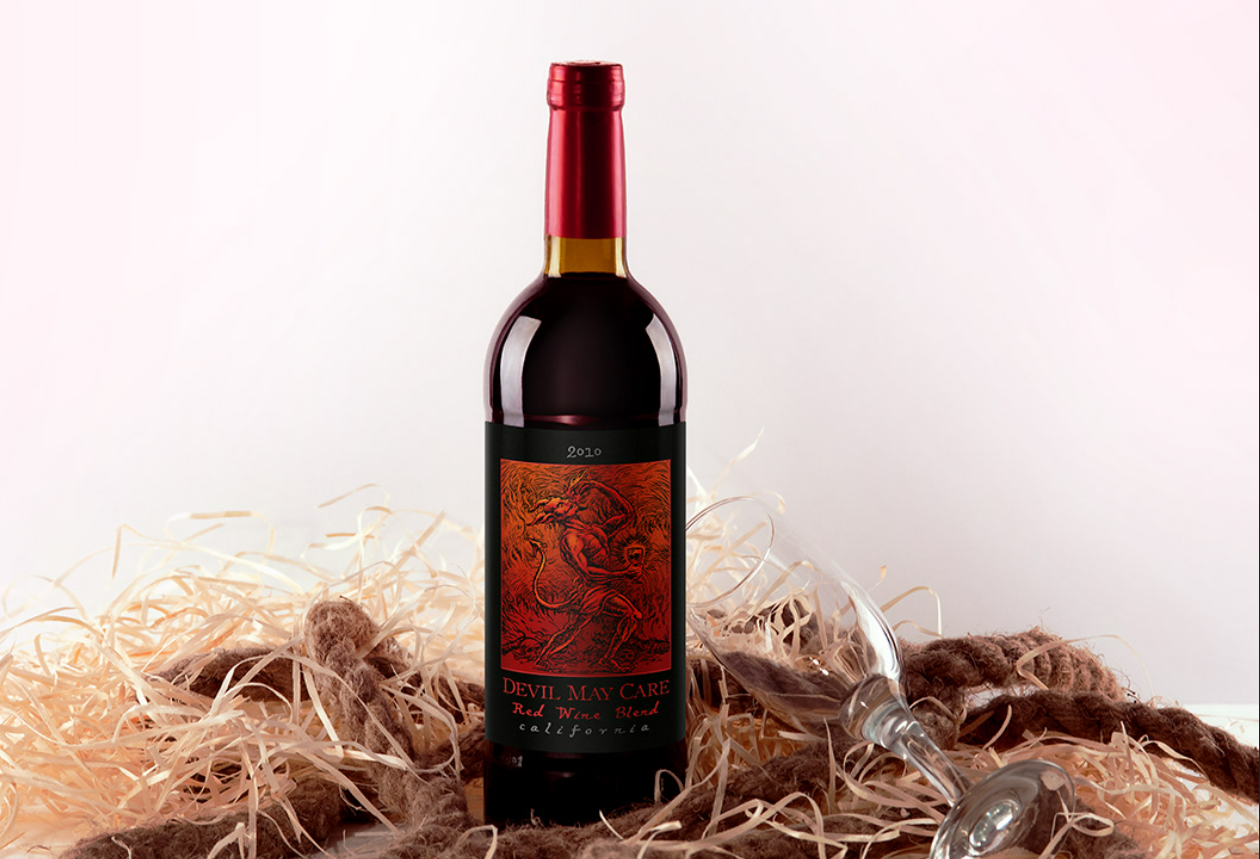

In [3]:
from IPython import display
display.Image(r"C:\Users\Antima\Pictures\Screenshots\Screenshot (41).png")

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
### to check name of columns 
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
### to check unique values for quality column
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
### to check count of each unique value in quality column
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
### to check null values 
df.isna().sum().sum()

0

In [9]:
### to get information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
### getting information about numerical column
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

# Numerical and categorical data

In [11]:
# define numerical & categorical columns
categorical_features = [i for i in df.columns if df[i].dtypes == 'object']
numeric_features = [i for i in df.columns if df[i].dtypes != 'object']
print(categorical_features)
print(numeric_features)

[]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [12]:
### getting count of unique value in each feature
for feature in numeric_features:
 print("'{}' has '{}' No. of unique values".format(feature, df[feature].nunique()))

'fixed acidity' has '96' No. of unique values
'volatile acidity' has '143' No. of unique values
'citric acid' has '80' No. of unique values
'residual sugar' has '91' No. of unique values
'chlorides' has '153' No. of unique values
'free sulfur dioxide' has '60' No. of unique values
'total sulfur dioxide' has '144' No. of unique values
'density' has '436' No. of unique values
'pH' has '89' No. of unique values
'sulphates' has '96' No. of unique values
'alcohol' has '65' No. of unique values
'quality' has '6' No. of unique values


In [13]:
continuous_features=[feature for feature in numeric_features if df[feature].nunique()>6]
print(continuous_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


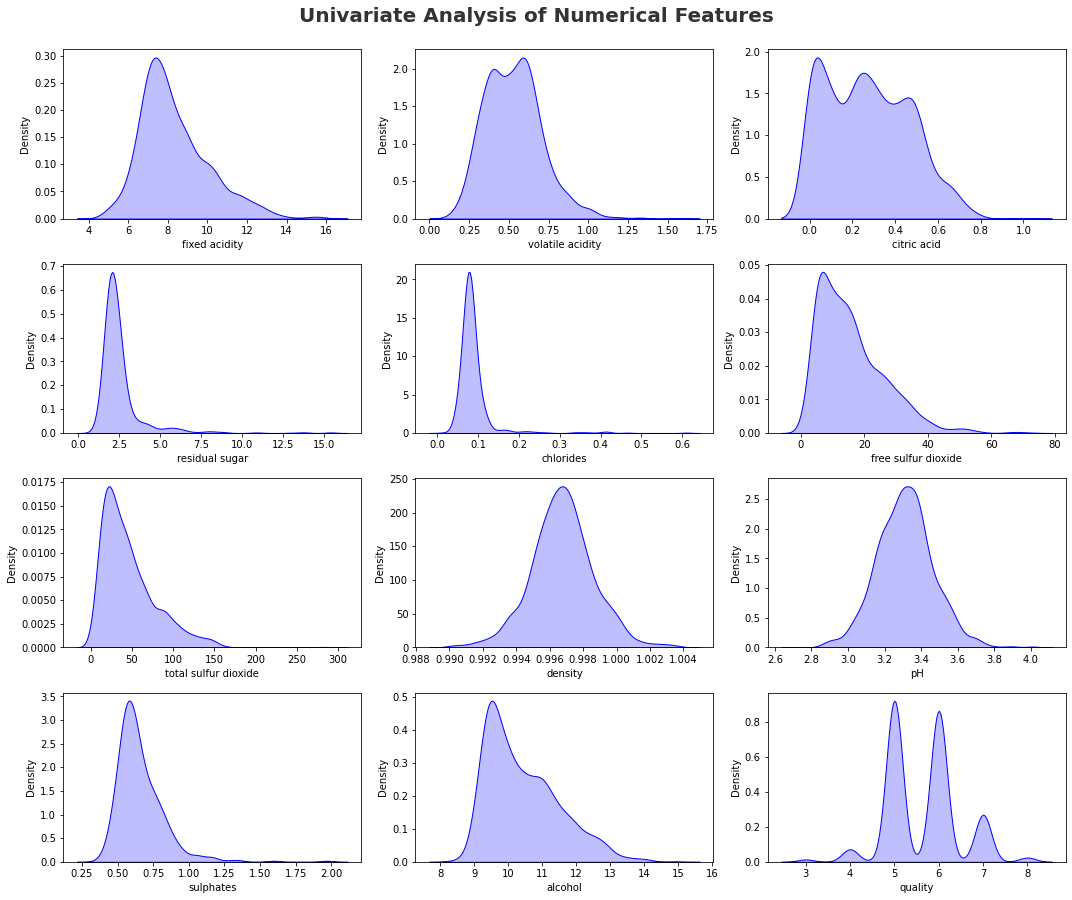

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

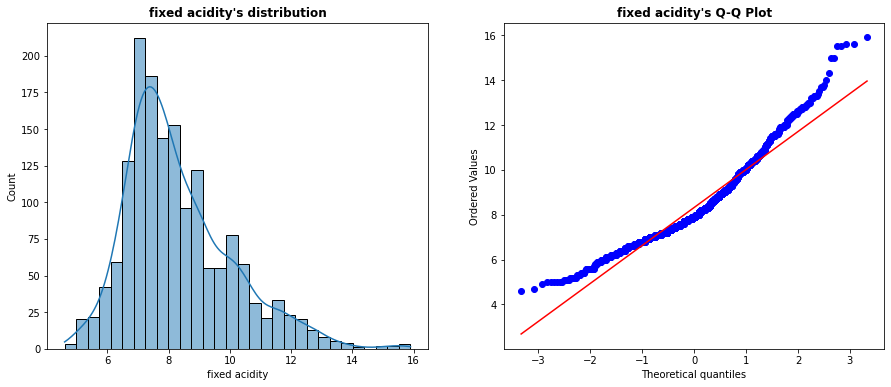

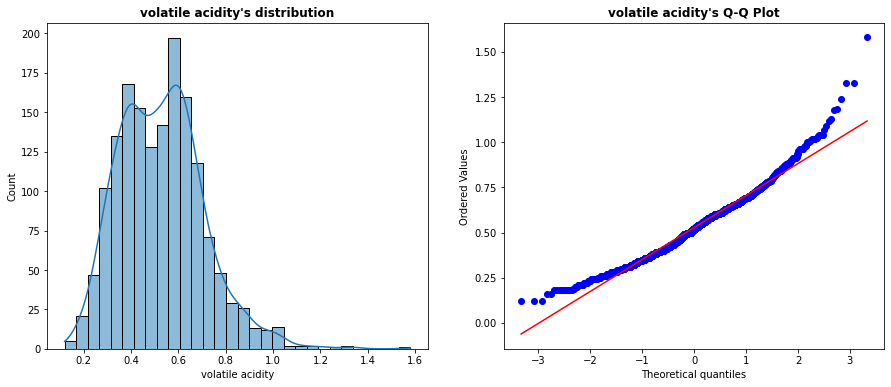

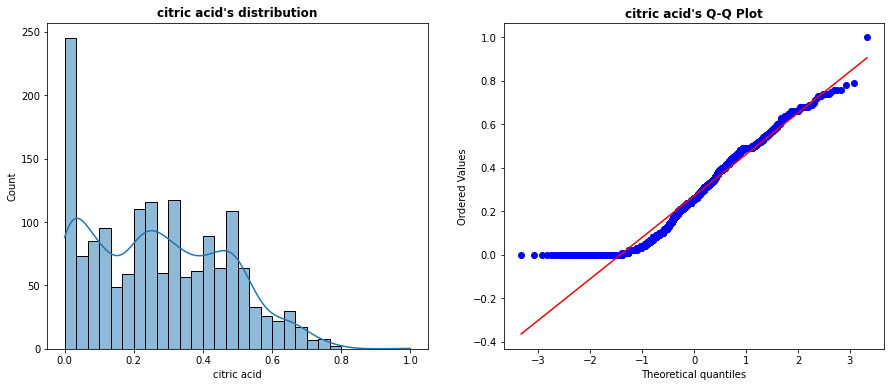

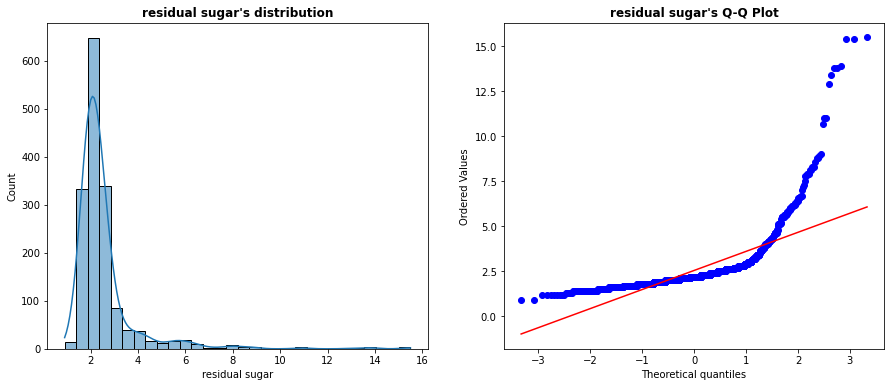

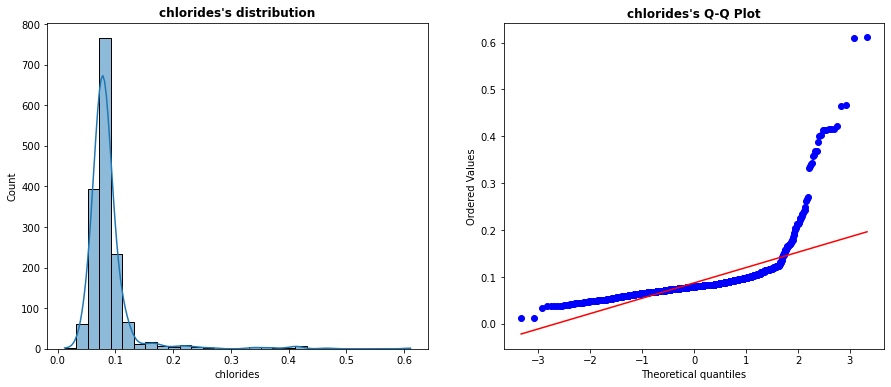

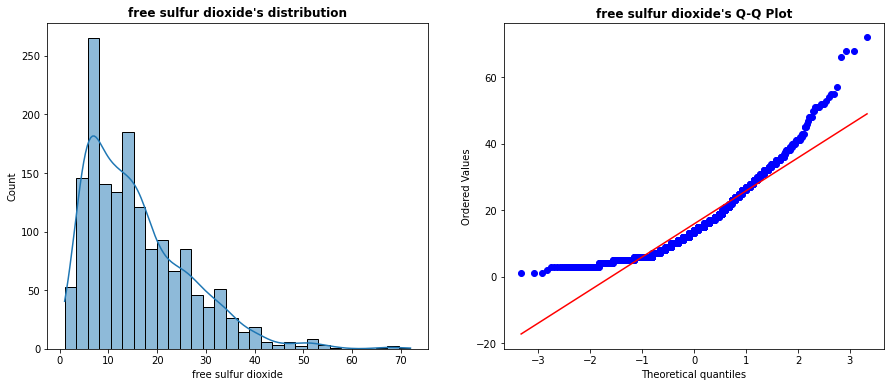

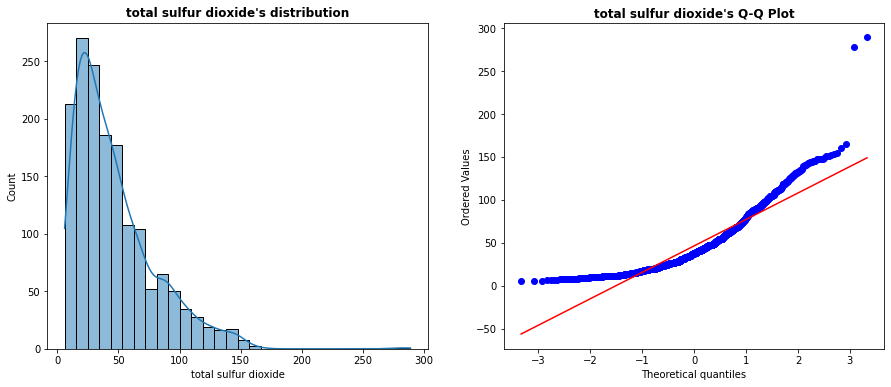

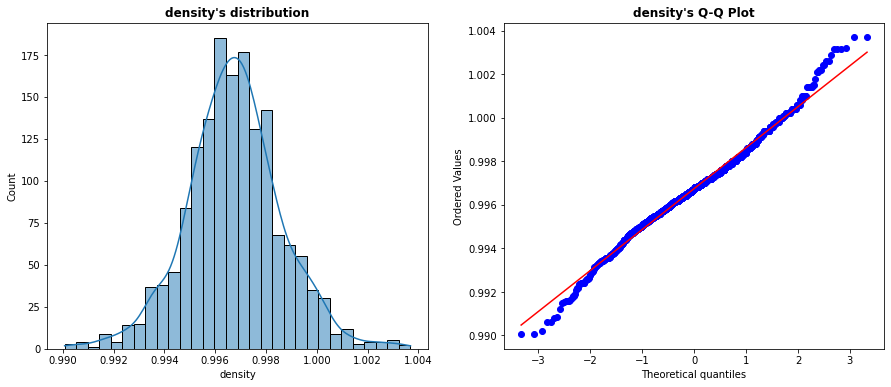

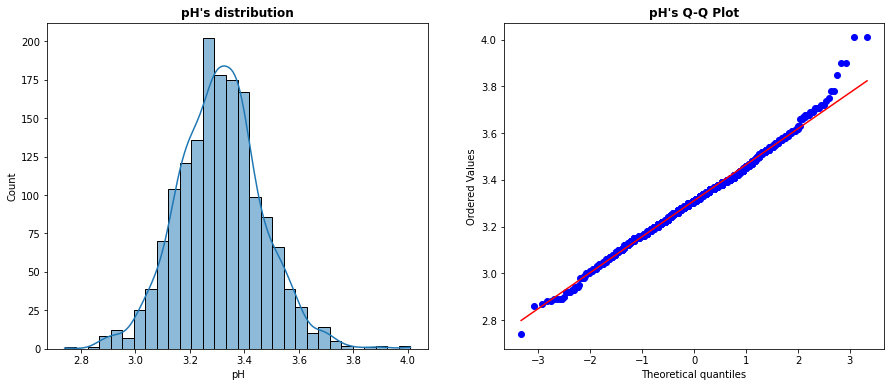

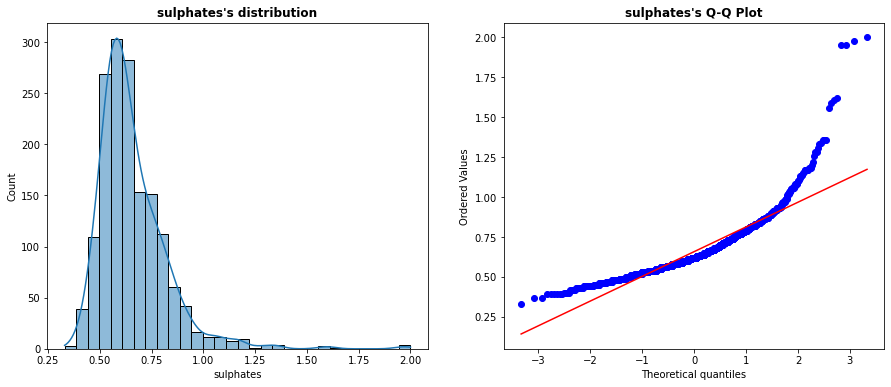

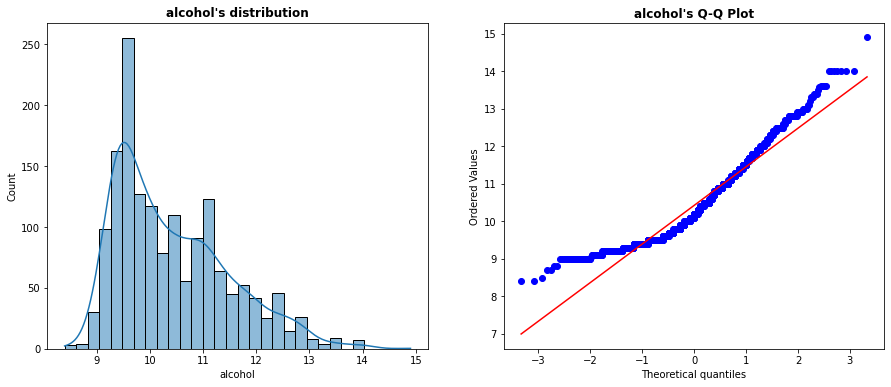

In [15]:
### For Q-Q Plot
import scipy.stats as stats

### Checking distribution of Continuous numerical features
for i in continuous_features:
 plt.figure(figsize=(15,6))
 plt.subplot(121)
 sns.histplot(data=df, x=i, kde=True, bins=30)
 plt.title("{}'s distribution".format(i),fontweight="bold")
 
 plt.subplot(122)
 stats.probplot(df[i], dist='norm', plot=plt)
 plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
 plt.show();

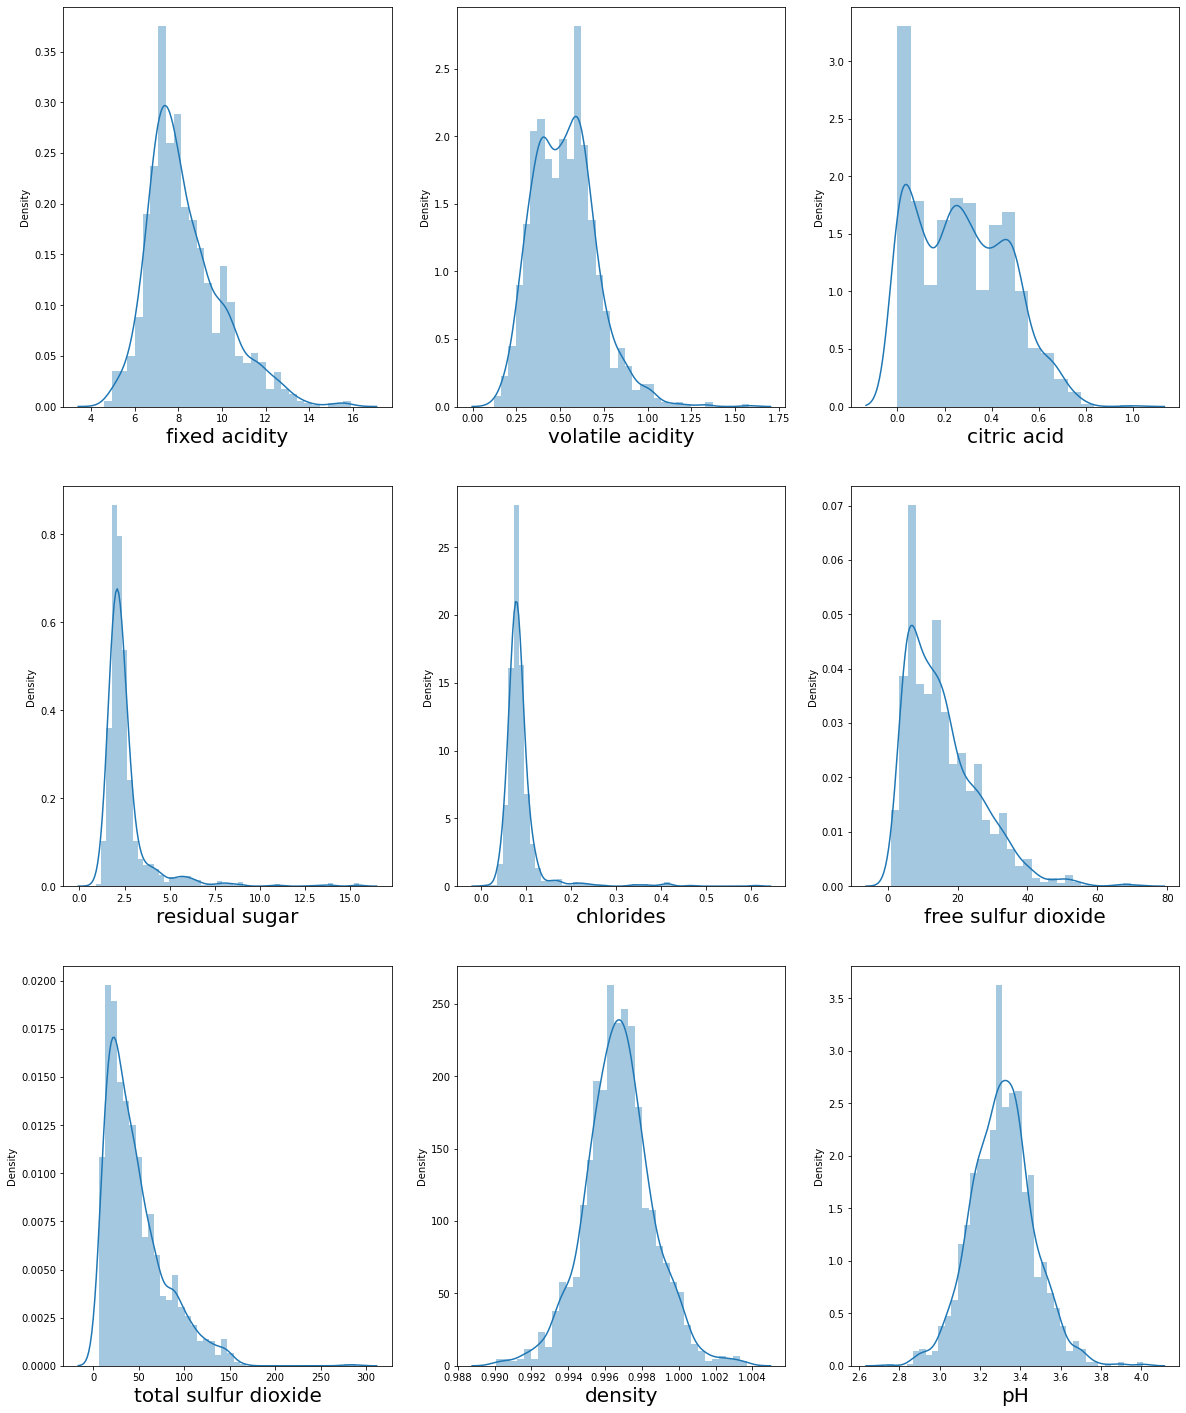

In [16]:
### let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
     
    plotnumber+=1
plt.show()

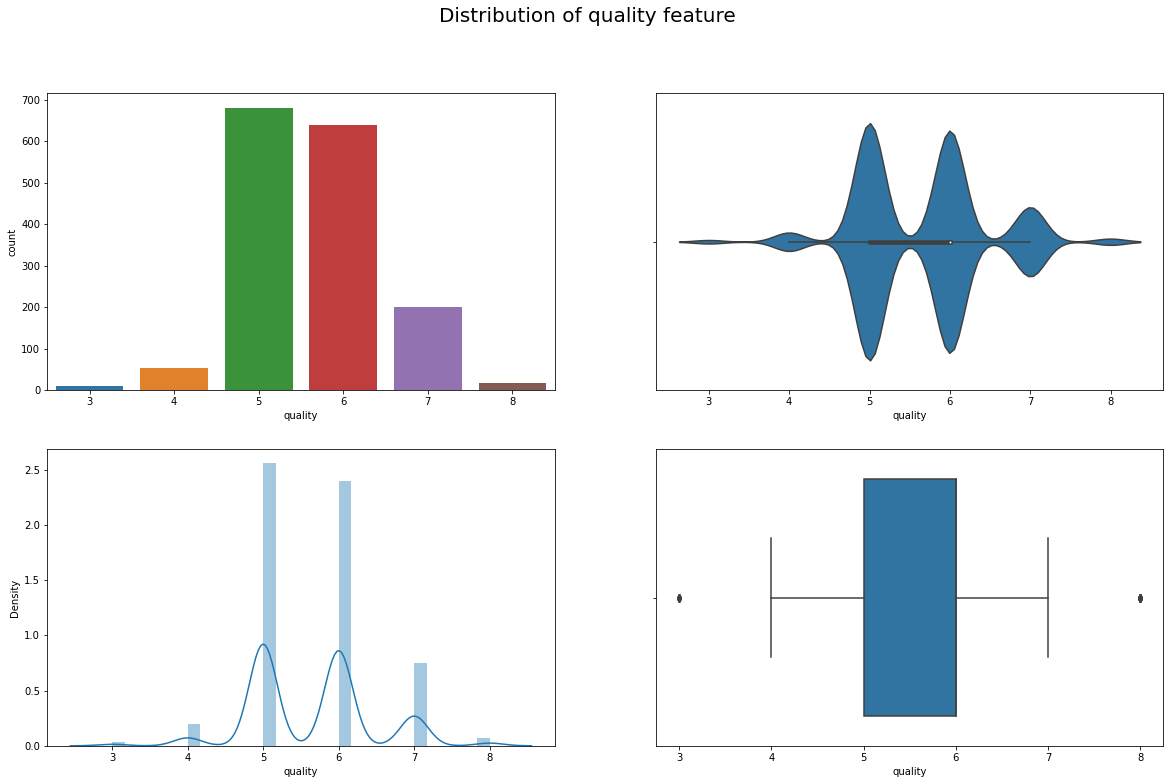

In [17]:
### Plotting a different plots to study the distribution of quality features
fig,ax = plt.subplots(2,2, figsize=(20,12))               
plt.suptitle("Distribution of quality feature", fontsize=20)
sns.countplot(df['quality'], ax = ax[0,0])
sns.distplot(df['quality'], ax = ax[1,0]) 
sns.violinplot(df['quality'], ax = ax[0,1])
sns.boxplot(df['quality'], ax = ax[1,1])

plt.show()


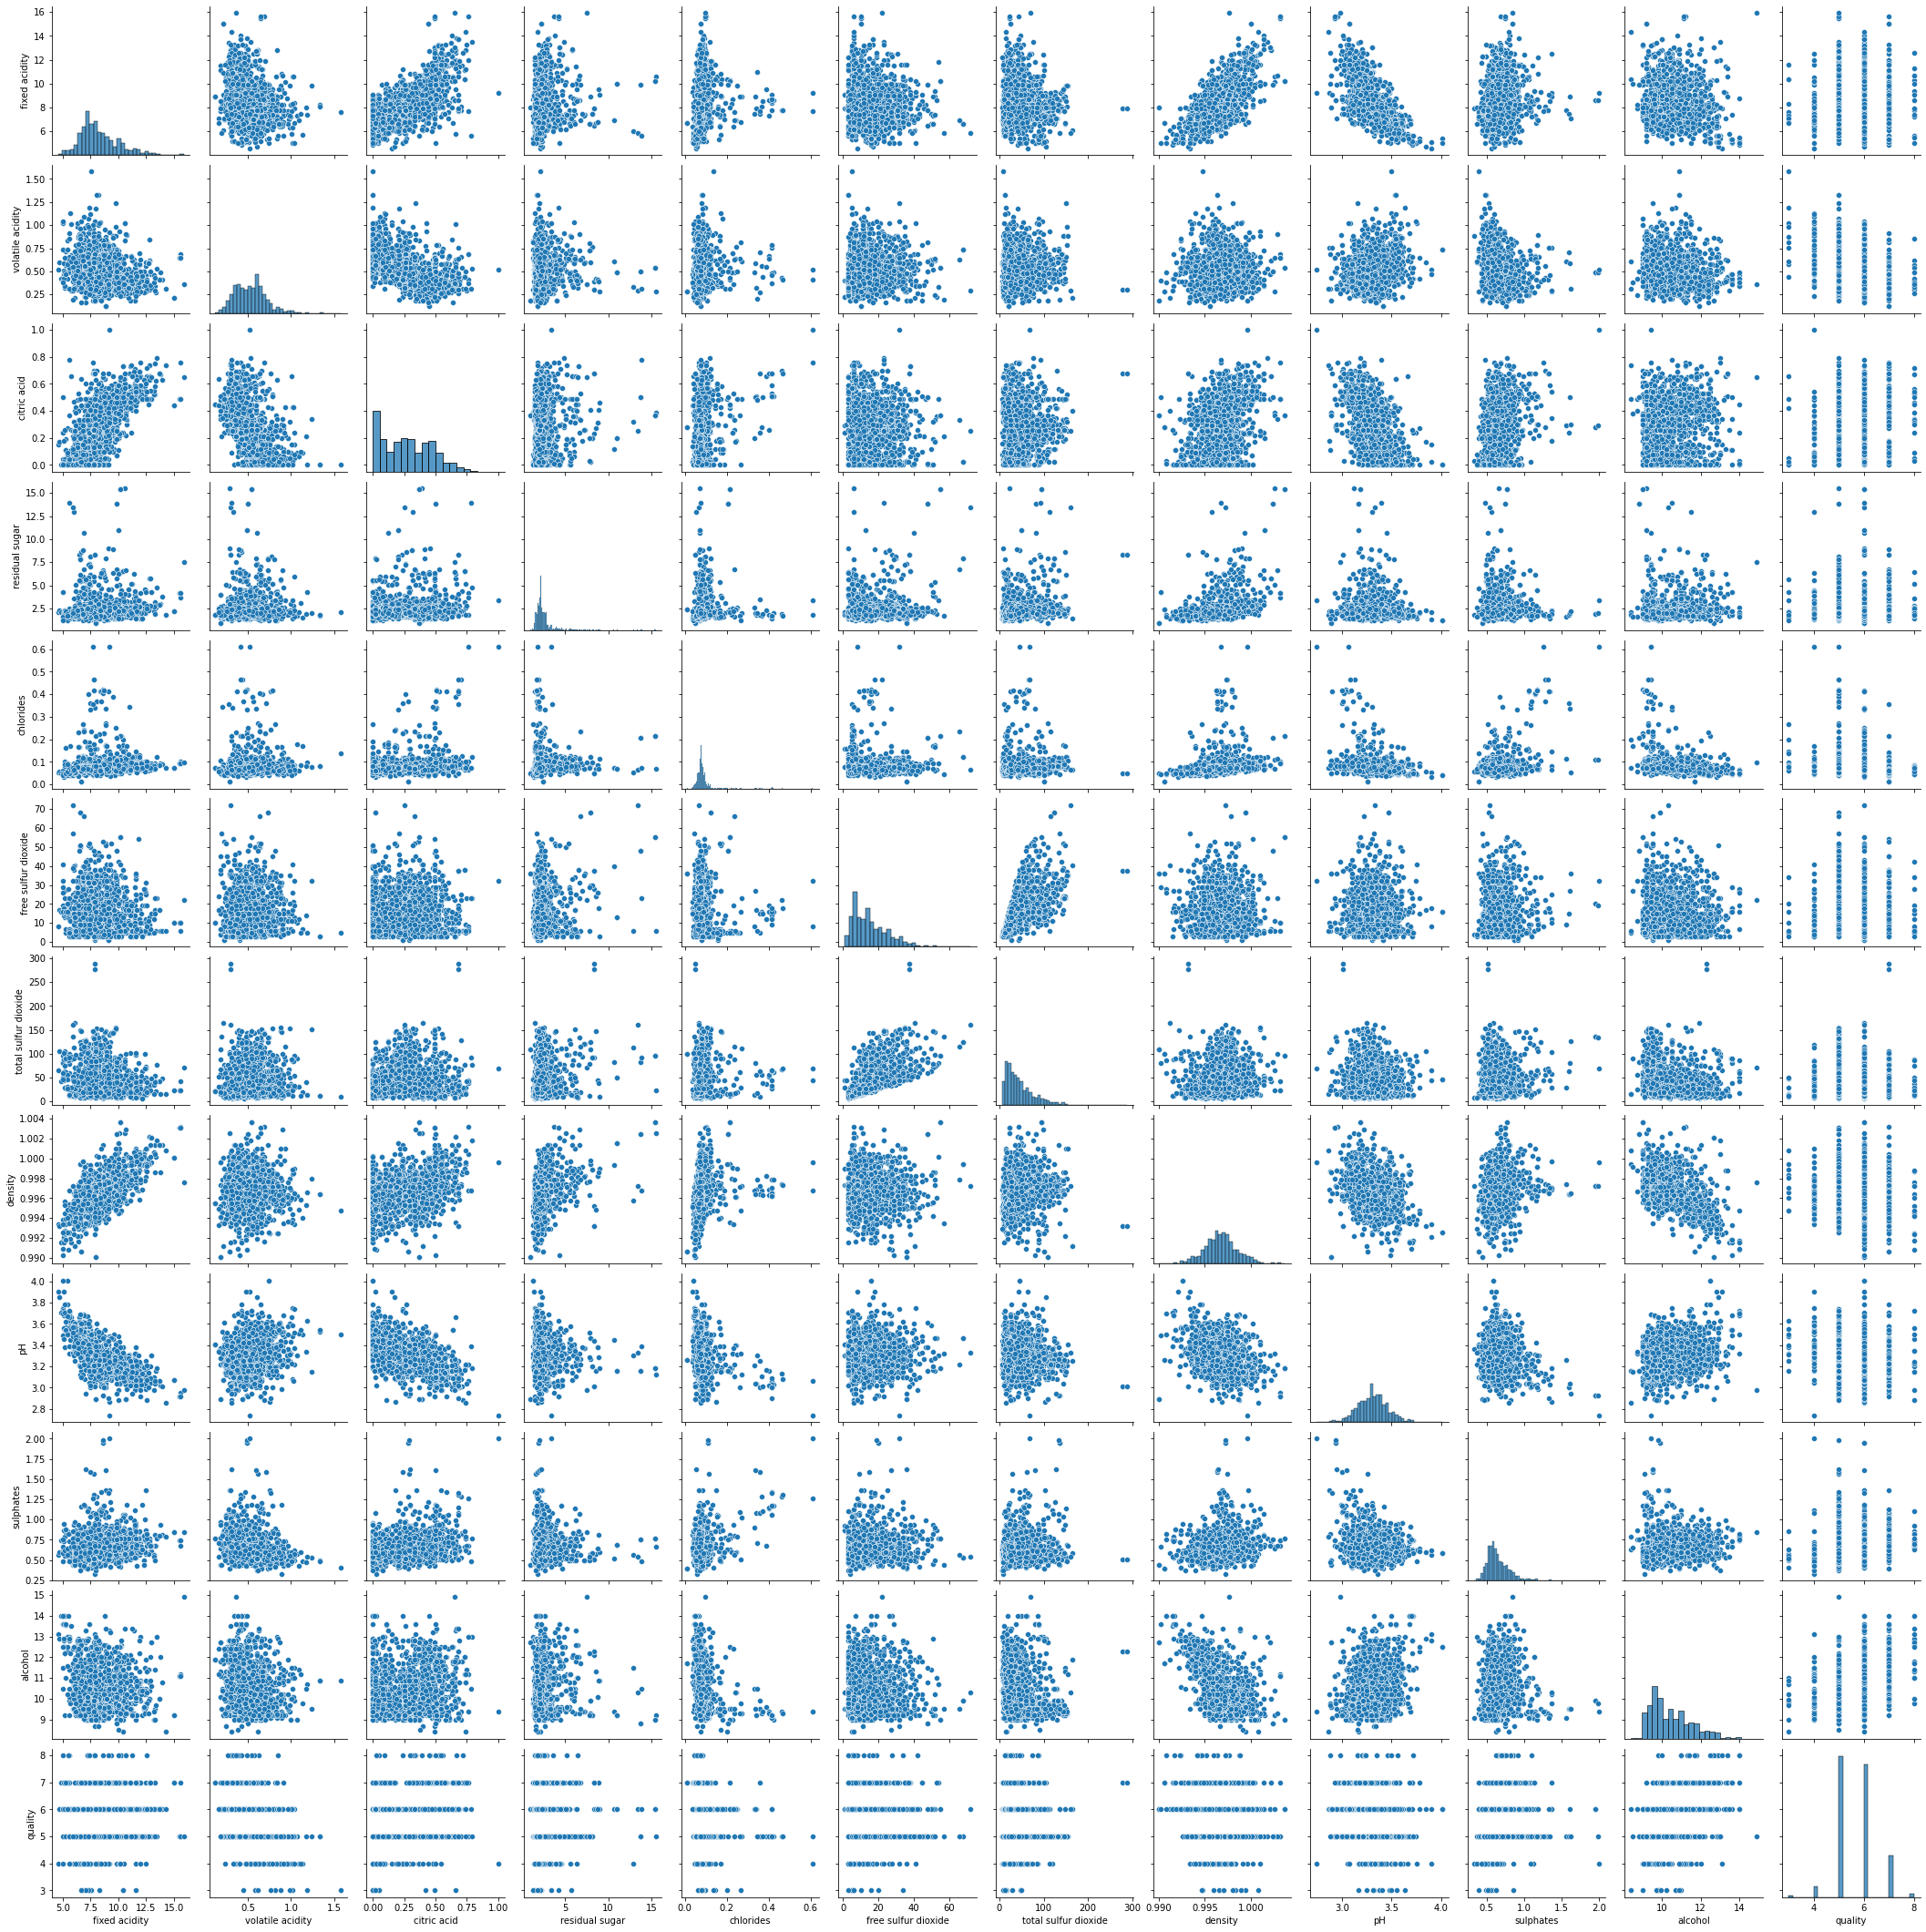

In [18]:
sns.pairplot(df)

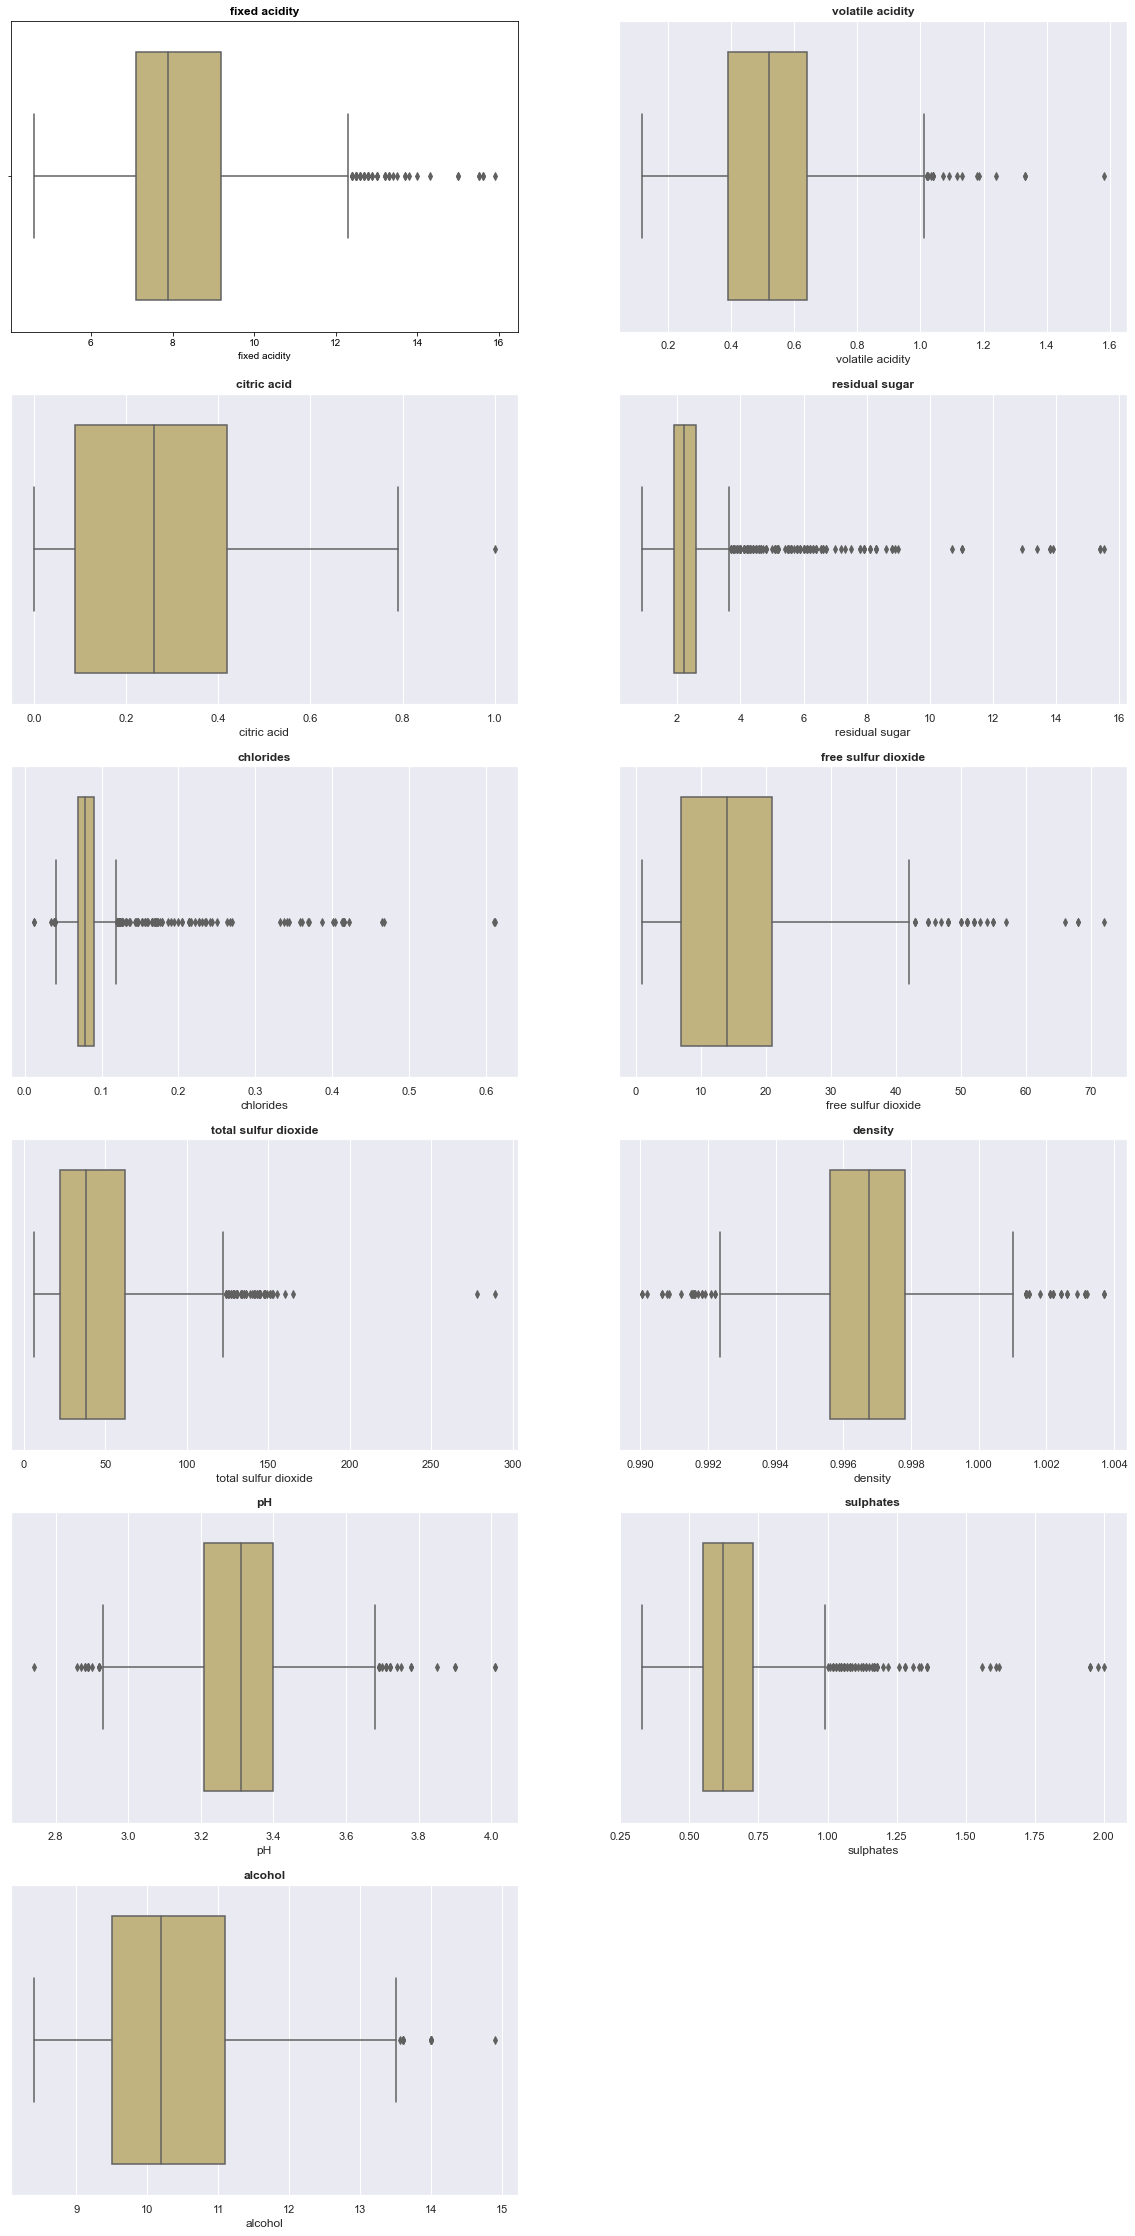

In [20]:
### Checking outliers in numerical features
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
 plt.subplot(6, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=df, x=i[1], color='y')
 plt.title("{}".format(i[1]), fontweight="bold")

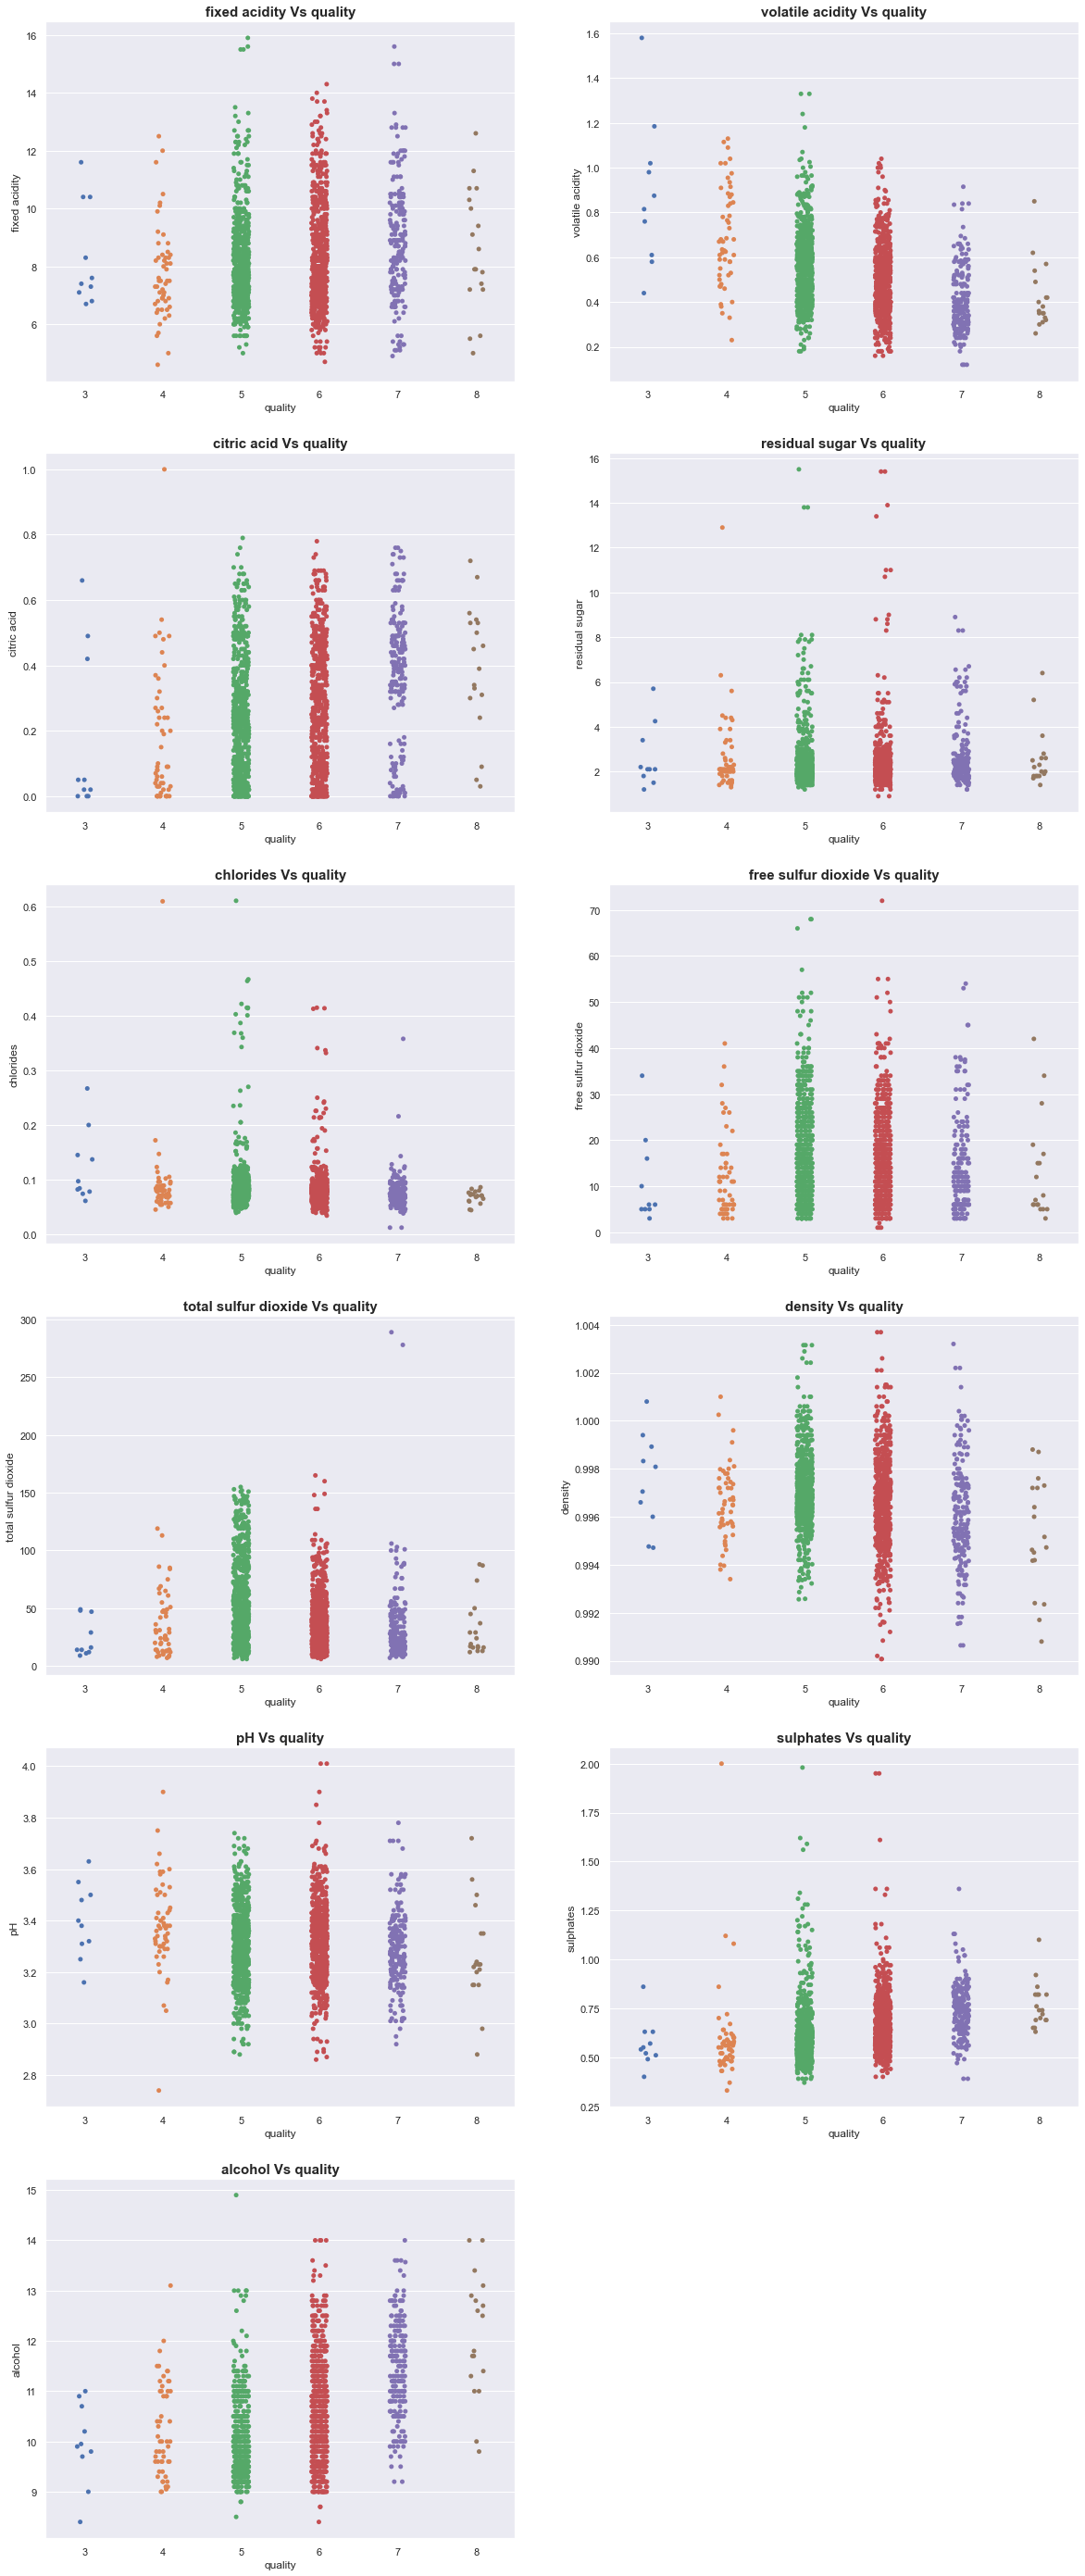

In [60]:

plt.figure(figsize=(20,50))
for i in enumerate(continuous_features):
 plt.subplot(6, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(7,8)})
 sns.stripplot(data=df, y=i[1], x='quality')
 plt.title("{} Vs quality".format(i[1]),fontsize=15, fontweight="bold")

# Check Multicollinearity in Numerical features

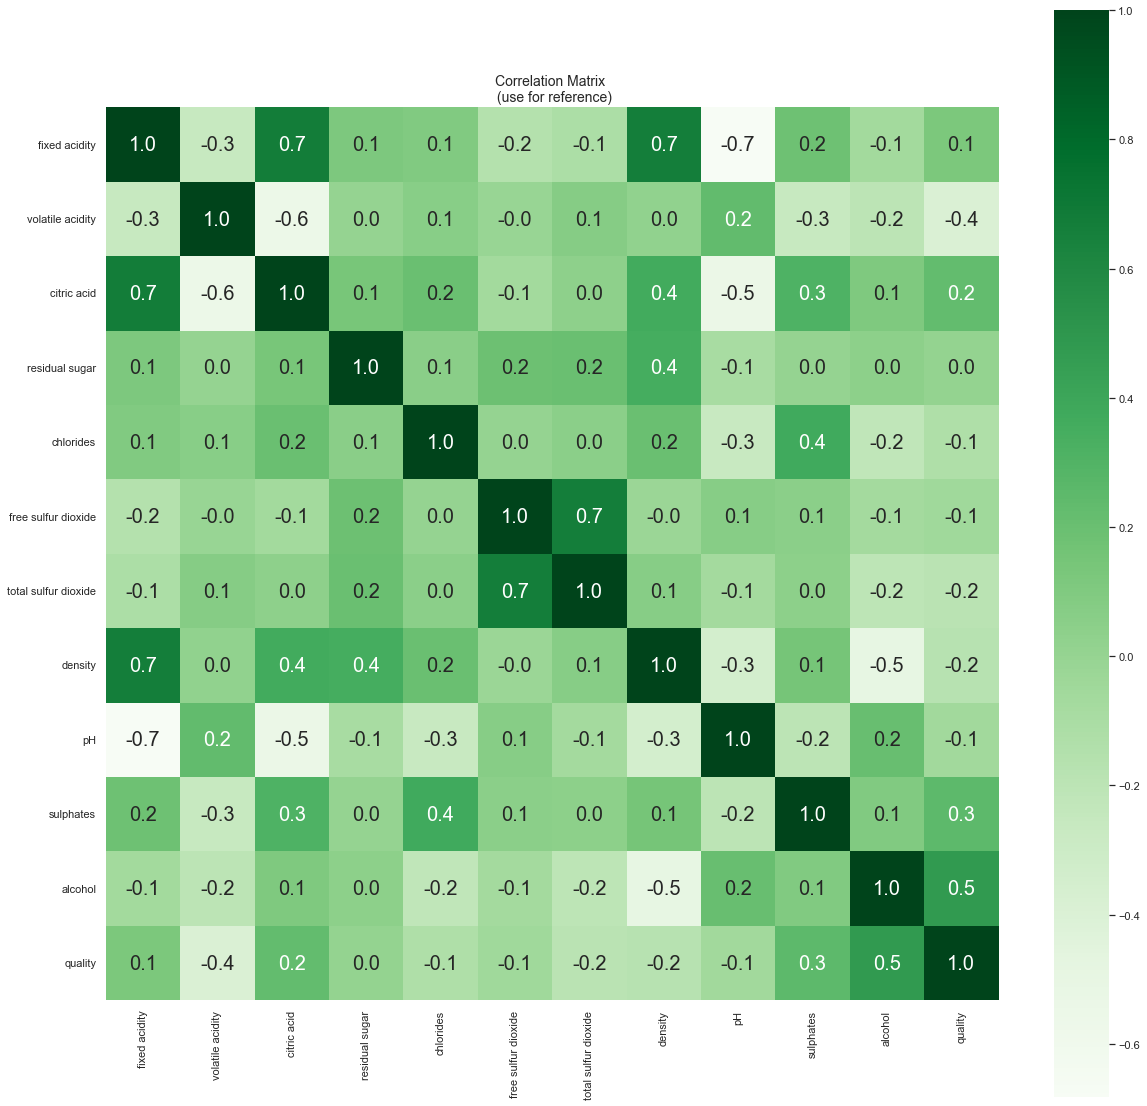

In [23]:
### Heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


In [24]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

<AxesSubplot:ylabel='Frequency'>

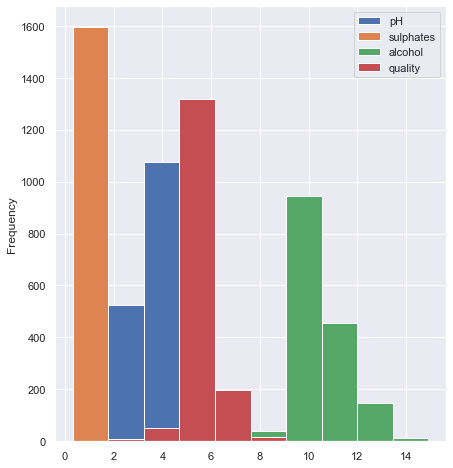

In [25]:
df.iloc[:,8:12].plot(kind="hist")

<AxesSubplot:xlabel='quality', ylabel='Count'>

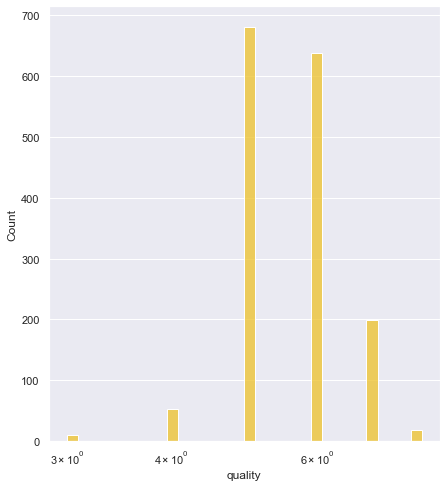

In [59]:
sns.histplot(data=df,x='quality',log_scale=True,color='#EDC128')

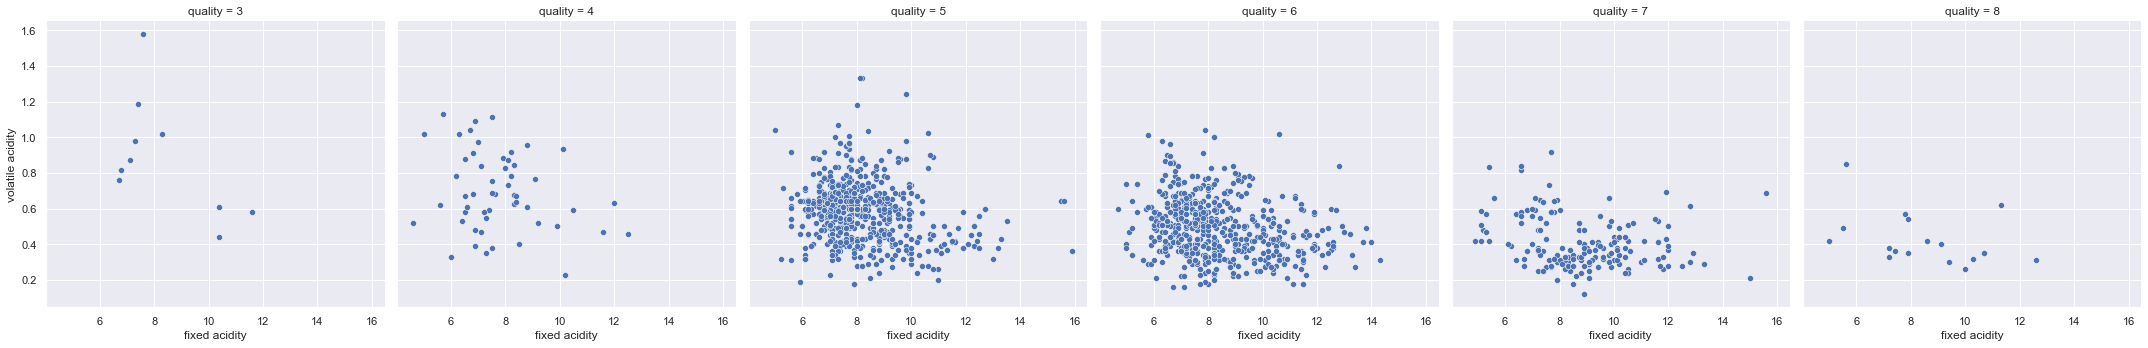

In [26]:

sns.relplot(data=df,x='fixed acidity',y='volatile acidity',col="quality")

# Splitting data into independent and dependent features

In [27]:
### splitting data into independent dataframe and dependent series
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [28]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [29]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [31]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
739            9.0              0.69         0.00             2.4      0.088   
663           10.1              0.28         0.46             1.8      0.050   
981            9.5              0.86         0.26             1.9      0.079   
463            8.1              0.66         0.70             2.2      0.098   
78             6.7              0.75         0.12             2.0      0.086   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
739                 19.0                  38.0  0.99900  3.35       0.60   
663                  5.0                  13.0  0.99740  3.04       0.79   
981                 13.0                  28.0  0.99712  3.25       0.62   
463                 25.0                 129.0  0.99720  3.08       0.53   
78                  12.0                  80.0  0.99580  3.38       0.52   

     alcohol  
739      9.3  
663     10.2  
981     10.0  
463      9.0  
78      10.1

In [32]:
y_train.head()

739    5
663    6
981    5
463    5
78     5
Name: quality, dtype: int64

In [33]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1518            7.4              0.47         0.46             2.2      0.114   
1246            7.4              0.74         0.07             1.7      0.086   
544            14.3              0.31         0.74             1.8      0.075   
1343            7.5              0.51         0.02             1.7      0.084   
428             9.1              0.52         0.33             1.3      0.070   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1518                  7.0                  20.0  0.99647  3.32       0.63   
1246                 15.0                  48.0  0.99502  3.12       0.48   
544                   6.0                  15.0  1.00080  2.86       0.79   
1343                 13.0                  31.0  0.99538  3.36       0.54   
428                   9.0                  30.0  0.99780  3.24       0.60   

      alcohol  
1518     10.5  
1246     10.0  
544       8.4  
1343     10.5  
428       9.3

In [34]:
y_test.head()

1518    5
1246    5
544     6
1343    6
428     5
Name: quality, dtype: int64

In [35]:
### both will have same shape
X_train.shape, y_train.shape

((1199, 11), (1199,))

In [36]:
### both will have same shape
X_test.shape, y_test.shape

((400, 11), (400,))

# Transforming data

In [37]:
scaler=StandardScaler()
scaler

StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.36628211,  0.9252263 , -1.41559084, ...,  0.2800327 ,
        -0.34099149, -1.03579592],
       [ 0.99530488, -1.38052243,  0.95277345, ..., -1.75526948,
         0.71993818, -0.17938734],
       [ 0.65220155,  1.88126845, -0.07695015, ..., -0.37651639,
        -0.22931468, -0.36970036],
       ...,
       [-0.77739563, -0.8181447 ,  1.10723199, ...,  0.54265233,
         0.60826138,  0.96249075],
       [ 0.93812099, -0.98685802,  1.00425963, ..., -0.50782621,
        -0.78769872,  1.5334298 ],
       [-0.77739563,  0.41908633,  0.12899457, ..., -0.04824185,
         2.84179753, -0.17938734]])

In [39]:
X_test=scaler.transform(X_test)
X_test

array([[-0.54866008, -0.31200473,  0.95277345, ...,  0.08306797,
        -0.17347628,  0.10608218],
       [-0.54866008,  1.20641516, -1.05518758, ..., -1.23003021,
        -1.01105233, -0.36970036],
       [ 3.39702815, -1.21180911,  2.3943865 , ..., -2.93705783,
         0.71993818, -1.89220449],
       ...,
       [-0.4914762 , -0.53695583,  0.12899457, ...,  0.87092688,
         0.32906936,  1.05764726],
       [-0.26274065, -0.14329141,  0.28345311, ..., -0.70479094,
        -0.6201835 , -0.8454829 ],
       [-0.37710842, -1.49299798, -0.07695015, ..., -1.03306548,
         0.71993818,  0.48670821]])

# Building SVC model,training and performance of model

In [40]:
svc=SVC()
svc

SVC()

In [41]:
svc.fit(X_train,y_train)

SVC()

In [42]:
svc_pred=svc.predict(X_test)
svc_pred

array([6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [44]:
confusion_mat=confusion_matrix(y_test,svc_pred)

In [45]:
confusion_mat

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  12,   3,   0,   0],
       [  0,   0, 124,  47,   1,   0],
       [  0,   0,  41, 105,   6,   0],
       [  0,   0,   2,  31,  17,   0],
       [  0,   0,   0,   6,   3,   0]], dtype=int64)

In [46]:
accuracy_sc=accuracy_score(y_test,svc_pred)

In [47]:
accuracy_sc

0.615

In [48]:
report=classification_report(y_test, svc_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.69      0.72      0.70       172
           6       0.54      0.69      0.61       152
           7       0.63      0.34      0.44        50
           8       0.00      0.00      0.00         9

    accuracy                           0.61       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.58      0.61      0.59       400



In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [51]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [52]:
log_pred=log_reg.predict(X_test)
log_pred

array([6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 4, 5, 6, 5, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 7, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 7, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 3, 5, 5, 5, 5,
       6, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 7, 6, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6,

In [53]:
report_log=classification_report(y_test, log_pred, zero_division=False)
print(report_log)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.66      0.66      0.66       172
           6       0.49      0.64      0.55       152
           7       0.54      0.30      0.38        50
           8       0.00      0.00      0.00         9

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.54      0.56      0.54       400



# Increasing performance of model (Hyper-parameter Tuning)

In [54]:
### using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
 model=SVC(kernel=kernel, C=1.0)
 model.fit(X_train, y_train)
 print("For kernel {} modal accuracy is {}".format(kernel, model.score(X_test, y_test)))

For kernel linear modal accuracy is 0.5575
For kernel rbf modal accuracy is 0.615
For kernel poly modal accuracy is 0.5925
For kernel sigmoid modal accuracy is 0.4475


In [55]:
### for polynomial kernel with different degree of polynomial with constant hyper-parameter C
for degree in range(1,11):
 model=SVC(kernel='poly', degree=degree, C=100)
 model.fit(X_train, y_train)
 print("For degree {} modal accuracy is {}".format(degree, model.score(X_test, y_test)))

For degree 1 modal accuracy is 0.5575
For degree 2 modal accuracy is 0.485
For degree 3 modal accuracy is 0.5525
For degree 4 modal accuracy is 0.575
For degree 5 modal accuracy is 0.5875
For degree 6 modal accuracy is 0.5775
For degree 7 modal accuracy is 0.57
For degree 8 modal accuracy is 0.5925
For degree 9 modal accuracy is 0.615
For degree 10 modal accuracy is 0.53


In [56]:
### using gridsearchcv to increase model efficiency by combining above parameters
param_grid={'C':[i for i in range(1,100,10)], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4,5,6,7]}
grid=GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [57]:
### getting best parameters after gridsearchCV
print("Best parameters are {} for optimal accuracy.".format(grid.best_params_))

Best parameters are {'C': 11, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy.


In [58]:
## getting best accuracy after gridsearchCV
print("Best accuracy is {}".format(grid.score(X_test, y_test)))

Best accuracy is 0.6225
